# Predicting-Covid-Cases-in-Mexico

## Business Understanding

### Problem Statement

The Ministry of Health is struggling to manage the escalating COVID-19 pandemic amid rising cases and limited resources in Mexico. Predictive analysis is urgently needed to inform public health interventions optimize hospital management strategies and  ensure early detection of the virus to provide containment and isolations to the affected. 

**Stakeholder:**
The Ministry of Health

**Objectives**

Identify key factors influencing the rise in Covid-19 cases.

Develop a predictive machine learning model to identify factors that may contribute to an increase in positive Covid-19 cases.

Provide insights and recommendation.


#### **The following conclusions were drawn**

**Early Detection and Containment:**
Age: Prioritizing vaccination for older adults is critical since age is a significant predictor of severe COVID-19 outcomes. This strategy can reduce mortality rates and the burden on healthcare systems.

 **Date Symptoms First Appeared:** Implementing aggressive testing and contact tracing for individuals reporting early onset of symptoms can swiftly identify and isolate positive cases, curbing the spread of the virus.
 
 **Patient Type (Inpatient):** Allocating hospital beds and ventilators to facilities with a higher proportion of inpatients ensures that resources are directed where they are most needed. Ensuring these hospitals are adequately staffed with specialized healthcare professionals will improve patient care and outcomes.
 
 **Mortality:** Conducting thorough reviews of mortality cases can identify factors leading to severe outcomes, allowing the Ministry of Health to refine and enhance treatment protocols, ultimately improving patient survival rates.
 
 **Respiratory Support for Severe Cases**
Pneumonia (Yes): Providing adequate respiratory support, including supplemental oxygen and ventilators, for patients with pneumonia is essential. This measure can significantly improve patient outcomes and reduce the severity of the disease



## Data Understanding

The dataset contains 10,000 entries (rows) and 23 columns.This dataset contains information about COVID-19 patients, including demographic information, medical history, symptoms, test results, and outcomes

The column names and their descriptions are as follows:

**id**:	Case identifier number

**sex**:	Identifies the sex of the patient.

**patient_type**:	Identifies the type of care received by the patient in the unit. It is called an outpatient if you returned home or it is called an inpatient if you were admitted to hospital.

**entry_date**:	Identifies the date of the patient's admission to the care unit.

**date_symptoms**:	Identifies the date on which the patient's symptoms began.

**date_died**:	Identifies the date the patient died. (Missing data means patient did not die)

**intubed**:	Identifies if the patient required intubation.

**pneumonia**:	Identifies if the patient was diagnosed with pneumonia.

**age**: Identifies the age of the patient.

**pregnancy**: Identifies if the patient is pregnant.

**diabetes**: Identifies if the patient has a diagnosis of diabetes.

**copd**: Identifies if the patient has a diagnosis of COPD.

**asthma**:	Identifies if the patient has a diagnosis of asthma.

**inmsupr**: Identifies if the patient has immunosuppression.

**hypertension**: Identifies if the patient has a diagnosis of hypertension.

**other_disease**:	Identifies if the patient has a diagnosis of other diseases.

**cardiovascular**:	Identifies if the patient has a diagnosis of cardiovascular disease.

**obesity**: Identifies if the patient is diagnosed with obesity.

**renal_chronic**:	Identifies if the patient has a diagnosis of chronic kidney failure.

**tobacco**: Identify if the patient has a smoking habit.

**contact_other_covid**: Identify if the patient had contact with any other case diagnosed with SARS CoV-2

**covid_res**: Identifies the result of the analysis of the sample reported by the laboratory

**icu**: Identifies if the patient required to enter an Intensive Care Unit.


## Data Preparation
Importing libraries
Before we embark on our journey through the housing market analysis, it's essential to equip ourselves with a comprehensive set of data science tools. Our toolkit includes numpy and pandas for advanced data handling, matplotlib and seaborn for engaging
visualization,  and a collection of sklearn features for data preprocessing, creation,
machine learning implementation, and performance evaluation.



In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import OneHotEncoder,StandardScaler, FunctionTransformer,  label_binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from scipy.stats import uniform

**Importing the dataset**: 
To kick off our  predictive analysis of covid , we start by importing the dataset  from covid_mexico_data.xlsx using
pandas, a powerful tool for data manipulation.We create a copy of this dataset to preserve the original data, allowing us to explore and manipulate the data without altering the
source.
Next, we preview the dataset to familiarize ourselves with its structure. Viewing the last entries with df.head() gives us insight into the
top 5 rows and df.tail() gives us the last 5 rows

In [2]:
data = pd.read_excel('covid_mexico_data.xlsx')
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0dd249,Male,Outpatient,24-05-2020,18-05-2020,NaN,NaN,Yes,29,NaN,...,No,No,No,No,No,No,Yes,Yes,Negative,NaN
1,0957d9,Female,Outpatient,18-06-2020,16-06-2020,NaN,NaN,No,45,No,...,No,No,No,No,No,No,No,NaN,Negative,NaN
2,0ad2eb,Female,Outpatient,11-05-2020,11-05-2020,NaN,NaN,No,25,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
3,1646ba,Female,Outpatient,24-06-2020,19-06-2020,NaN,NaN,No,11,No,...,No,No,No,No,No,No,No,Yes,Positive,NaN
4,1e31dd,Male,Outpatient,17-05-2020,16-05-2020,NaN,NaN,No,28,NaN,...,No,No,No,No,No,No,No,Yes,Negative,NaN


### Data Preview
Provides a quick glance at the structure and contents of the dataset, offering insights into the columns, data types, missing values, and potential issues like class imbalance. Understanding these aspects helps in planning appropriate data preparation steps, such as handling missing values. This dataset contains 10,000 entries (rows) and 23 columns. Most columns have non-null values, but some columns have missing values, such as "date_died," "intubed," "pregnancy," etc. The data types vary across columns, with most columns being of type object (likely strings) and one column, "age," being of type int64 (integer).

In [3]:
df = data.copy()
#Viewing the last five rows
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0dd249,Male,Outpatient,24-05-2020,18-05-2020,NaN,NaN,Yes,29,NaN,...,No,No,No,No,No,No,Yes,Yes,Negative,NaN
1,0957d9,Female,Outpatient,18-06-2020,16-06-2020,NaN,NaN,No,45,No,...,No,No,No,No,No,No,No,NaN,Negative,NaN
2,0ad2eb,Female,Outpatient,11-05-2020,11-05-2020,NaN,NaN,No,25,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
3,1646ba,Female,Outpatient,24-06-2020,19-06-2020,NaN,NaN,No,11,No,...,No,No,No,No,No,No,No,Yes,Positive,NaN
4,1e31dd,Male,Outpatient,17-05-2020,16-05-2020,NaN,NaN,No,28,NaN,...,No,No,No,No,No,No,No,Yes,Negative,NaN


In [4]:
#Viewing the last five rows
df.tail()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
9995,1b5791,Male,Outpatient,16-06-2020,15-06-2020,NaN,NaN,No,43,NaN,...,No,No,No,No,No,No,No,No,Negative,NaN
9996,15b33c,Male,Inpatient,05-05-2020,24-04-2020,NaN,No,Yes,31,NaN,...,No,No,No,No,No,No,No,No,Positive,No
9997,14fa3f,Male,Outpatient,26-05-2020,22-05-2020,NaN,NaN,No,24,NaN,...,No,No,No,No,No,No,No,Yes,Negative,NaN
9998,09e1c3,Female,Outpatient,08-05-2020,05-05-2020,NaN,NaN,No,42,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
9999,16d40b,Female,Outpatient,16-04-2020,16-04-2020,NaN,NaN,No,24,No,...,No,No,No,No,No,No,No,No,Negative,NaN


In [5]:
df.shape
#cheking total number of rows and columns in the dataframe

(10000, 23)

In [6]:
# outputs the column names of the DataFrame df.
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [7]:
# provides a concise summary of a DataFrame, index dtype and column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10000 non-null  object
 1   sex                  10000 non-null  object
 2   patient_type         10000 non-null  object
 3   entry_date           10000 non-null  object
 4   date_symptoms        10000 non-null  object
 5   date_died            639 non-null    object
 6   intubed              2137 non-null   object
 7   pneumonia            9999 non-null   object
 8   age                  10000 non-null  int64 
 9   pregnancy            4841 non-null   object
 10  diabetes             9965 non-null   object
 11  copd                 9969 non-null   object
 12  asthma               9968 non-null   object
 13  inmsupr              9966 non-null   object
 14  hypertension         9968 non-null   object
 15  other_disease        9956 non-null   object
 16  cardi

In [8]:
df.diabetes.value_counts()

No     8745
Yes    1220
Name: diabetes, dtype: int64

In [9]:
df.copd.value_counts()

No     9813
Yes     156
Name: copd, dtype: int64

In [10]:
df.asthma.value_counts()

No     9647
Yes     321
Name: asthma, dtype: int64

## Data Cleaning

The code below  aims to convert categorical variables in the specified subset of columns to numerical values, where "Yes" is replaced by 1 and "No" is replaced by 0.This allows for the exploration of relationships between variables through statistical measures such as correlation coefficients and facilitates a more comprehensive and structured EDA process.



In [11]:
# subset=['pregnancy', 'diabetes', 'copd', 'intubed','pneumonia',
#        'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
#        'obesity', 'renal_chronic', 'tobacco','contact_other_covid', 'icu']
# df[subset]=df[subset].replace({'Yes':1, 'No':0})

In [12]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0dd249,Male,Outpatient,24-05-2020,18-05-2020,NaN,NaN,Yes,29,NaN,...,No,No,No,No,No,No,Yes,Yes,Negative,NaN
1,0957d9,Female,Outpatient,18-06-2020,16-06-2020,NaN,NaN,No,45,No,...,No,No,No,No,No,No,No,NaN,Negative,NaN
2,0ad2eb,Female,Outpatient,11-05-2020,11-05-2020,NaN,NaN,No,25,No,...,No,No,No,No,No,No,No,Yes,Negative,NaN
3,1646ba,Female,Outpatient,24-06-2020,19-06-2020,NaN,NaN,No,11,No,...,No,No,No,No,No,No,No,Yes,Positive,NaN
4,1e31dd,Male,Outpatient,17-05-2020,16-05-2020,NaN,NaN,No,28,NaN,...,No,No,No,No,No,No,No,Yes,Negative,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10000 non-null  object
 1   sex                  10000 non-null  object
 2   patient_type         10000 non-null  object
 3   entry_date           10000 non-null  object
 4   date_symptoms        10000 non-null  object
 5   date_died            639 non-null    object
 6   intubed              2137 non-null   object
 7   pneumonia            9999 non-null   object
 8   age                  10000 non-null  int64 
 9   pregnancy            4841 non-null   object
 10  diabetes             9965 non-null   object
 11  copd                 9969 non-null   object
 12  asthma               9968 non-null   object
 13  inmsupr              9966 non-null   object
 14  hypertension         9968 non-null   object
 15  other_disease        9956 non-null   object
 16  cardi

In [14]:
## outputs statistics sumary of the data
df.describe()

,age
count,10000.000000
mean,42.772600
std,19.634629
min,-67.000000
25%,31.000000
50%,41.000000
75%,53.000000
max,856.000000


### Dealing with misssing values
We calculate the percentage of missing values in each column, providing insights into the extent of missing data and guiding decisions on how to handle missing values appropriately. Four columns, 'id', 'icu', 'intubed', 'contact_other_covid' were
removed. The id column, while unique, didn't contribute to the analysis since it only identifies unique data points. The 'icu', 'intubed' and 'contact_other_covid' had a very high percentage of missing values. Imputing the misssing values would create a huge assumption interfering with the data integrity.

We dropped rows  in columns that had  percentage of missing values below 1 ensuring that the remaining data retained its integrity and accuracy, as it minimizes the impact of missing data on subsequent analysis or modeling.


In [15]:
# chencking the percentage of missing values
df.isna().sum()/100

id                      0.00
sex                     0.00
patient_type            0.00
entry_date              0.00
date_symptoms           0.00
date_died              93.61
intubed                78.63
pneumonia               0.01
age                     0.00
pregnancy              51.59
diabetes                0.35
copd                    0.31
asthma                  0.32
inmsupr                 0.34
hypertension            0.32
other_disease           0.44
cardiovascular          0.34
obesity                 0.31
renal_chronic           0.33
tobacco                 0.34
contact_other_covid    31.07
covid_res               0.00
icu                    78.63
dtype: float64

In [16]:
# columns to be dropped
df= df.drop(['id', 'icu', 'intubed', 'contact_other_covid'], axis=1)
# List of columns with missing values below 1%
columns_to_drop_na = ['pneumonia', 'diabetes', 'copd', 'asthma', 
                   'inmsupr', 'hypertension', 'other_disease', 
                   'cardiovascular', 'obesity', 'renal_chronic', 'tobacco']
df.dropna(subset=columns_to_drop_na, inplace=True, axis=0)

The percentage of missing values in the pregnancy column is indeed 51.59%. Replaced the missing values with th mode.

In [17]:
df.pregnancy.value_counts()
df['pregnancy']=df['pregnancy'].fillna(df['pregnancy'].mode()[0])


We created a new column 'died' in the DataFrame, indicating whether the patient died or not based on the presence of a date in the 'date_died' column. Boolean values are optionally converted to integers (True -> 1, False -> 0).

In [18]:
# Create a new column 'died' indicating whether the patient died or not
df['died'] = df['date_died'].notnull()

# Optionally, you can convert the boolean values to integers (True -> 1, False -> 0)
df['died'] = df['died'].astype(int)

# Display the DataFrame to verify the changes
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,died
0,Male,Outpatient,24-05-2020,18-05-2020,NaN,Yes,29,No,No,No,No,No,No,No,No,No,No,Yes,Negative,0
1,Female,Outpatient,18-06-2020,16-06-2020,NaN,No,45,No,No,No,No,No,No,No,No,No,No,No,Negative,0
2,Female,Outpatient,11-05-2020,11-05-2020,NaN,No,25,No,No,No,No,No,No,No,No,No,No,No,Negative,0
3,Female,Outpatient,24-06-2020,19-06-2020,NaN,No,11,No,No,No,Yes,No,No,No,No,No,No,No,Positive,0
4,Male,Outpatient,17-05-2020,16-05-2020,NaN,No,28,No,No,No,No,No,No,No,No,No,No,No,Negative,0


**Handling duplicated values**

The first line of code checks the number of duplicated rows in the DataFrame `df`, while the second line removes duplicated rows, keeping only the first occurrence of each duplicate entry.By eliminating redundant information,  we focus on genuine patterns and relationships in the data, leading to more insightful and actionable findings.

In [19]:
df.duplicated().sum()
# Assuming df is your DataFrame
df.drop_duplicates(keep='first', inplace=True)

In the provided data, "Femalee" and "Males" appear to be typographical errors, likely meant to represent "Female" and "Male," respectively. By correcting these typos, we ensured that the gender categories are uniform and accurately represent the intended groups.

In [20]:
df.sex.value_counts() 


Male       4979
Female     4674
Femalee     110
Males        52
Name: sex, dtype: int64

In [21]:
df['sex']= df['sex'].replace({'Femalee':'Female', 'Males':'Male'})
df.sex.value_counts()

Male      5031
Female    4784
Name: sex, dtype: int64

Confirming if  missing values were dropped


In [22]:
df.isna().sum()/100

sex                0.00
patient_type       0.00
entry_date         0.00
date_symptoms      0.00
date_died         91.82
pneumonia          0.00
age                0.00
pregnancy          0.00
diabetes           0.00
copd               0.00
asthma             0.00
inmsupr            0.00
hypertension       0.00
other_disease      0.00
cardiovascular     0.00
obesity            0.00
renal_chronic      0.00
tobacco            0.00
covid_res          0.00
died               0.00
dtype: float64

In [23]:
df.shape 

(9815, 20)

The age column exhibited some outrageous values.Some values exceeded the normal life expectancy of human beings and some were negative values which is unrealistic. We had to drop these values to improve the quality of the data.

In [24]:
# unique age values present in the dataset
df.age.unique() 

array([ 29,  45,  25,  11,  28,   9,  58,  76,  30,  47,  34,  46,  38,
        68,  51,  44,  89,  53,  48,  73,  43,  31,  69,  61,   4,  60,
        59,  15,  19,  79,  40,  65,  42,  35,  24,  77,  33,  37,  22,
        36,  20,  93,  81,  21,  41,  90,  66,  50,  67,  54,  72,  52,
        13,  39,  75,  23,  62,  56,   1,  57,  55,  32,  14,   3,  84,
         0,  49,  16,   5,  80,  27,  82,   8,  26,  83,   6,  64,  85,
        63,   2,  18,  17,  12,  10, 100,  88,  86,  70,  71,  74,  87,
        99,   7,  78,  98,  95,  92,  97,  94,  91,  96, 107, 311, -56,
       483, 856, -48, 280, 155, -67], dtype=int64)

C:\Users\Dee\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


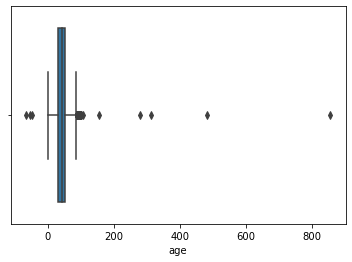

In [25]:
sns.boxplot(df['age']);
warnings.filterwarnings('ignore')

In [26]:
# This code will select rows where the age is either less than 0 or greater than 100.
df.loc[(df['age'] < 0) | (df['age'] > 110)]


,sex,patient_type,entry_date,date_symptoms,date_died,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,died
9630,Male,Inpatient,11-04-2020,10-04-2020,NaN,Yes,311,No,No,No,No,No,No,No,No,No,No,Yes,Negative,0
9634,Male,Outpatient,25-05-2020,20-05-2020,NaN,No,-56,No,No,No,No,No,No,No,No,No,No,No,Positive,0
9772,Male,Outpatient,07-05-2020,02-05-2020,NaN,No,483,No,No,No,No,No,No,No,No,No,No,No,Positive,0
9812,Female,Outpatient,07-05-2020,04-05-2020,NaN,No,856,No,No,No,No,No,Yes,No,No,No,No,No,Negative,0
9848,Male,Outpatient,26-05-2020,20-05-2020,NaN,No,-48,No,No,No,No,No,No,No,No,No,No,Yes,Awaiting Results,0
9910,Male,Outpatient,25-06-2020,24-06-2020,NaN,No,280,No,No,No,No,No,No,No,No,No,No,No,Awaiting Results,0
9980,Male,Outpatient,06-05-2020,30-04-2020,NaN,No,155,No,No,No,No,No,No,No,No,No,No,No,Negative,0
9986,Male,Outpatient,23-06-2020,19-06-2020,NaN,No,-67,No,Yes,No,No,No,Yes,No,No,No,No,No,Negative,0


In [27]:
# Assuming df is your DataFrame
df = df.drop(df[(df['age'] < 0) | (df['age'] > 100)].index)
# df.age.unique()

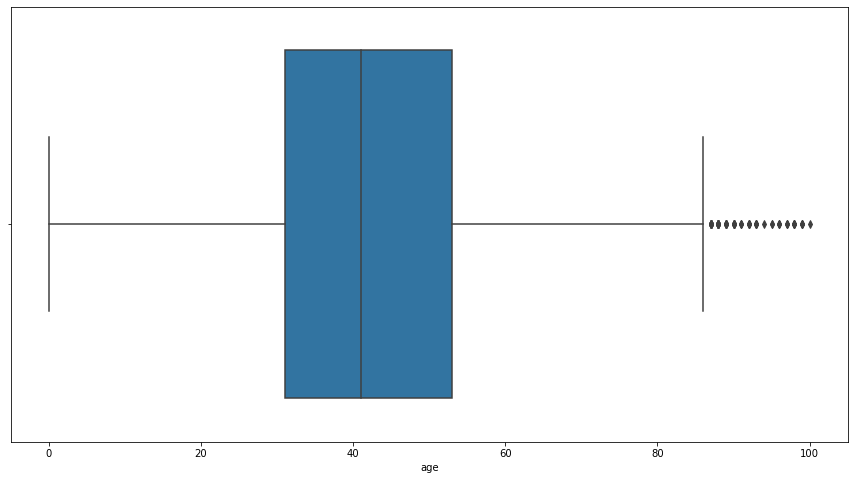

In [28]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,8)) 
sns.boxplot(df['age']);

In [29]:
df['date_symptoms'] = pd.to_datetime(df['date_symptoms'])  # Convert to datetime format
df['date_symptoms'] = df['date_symptoms'].dt.month  # Extract month as integer
df['date_symptoms'] =df['date_symptoms'].astype(int)



In [30]:
# sns.boxplot(df['date_symptoms'])

## Data Visualization

**Univariate**

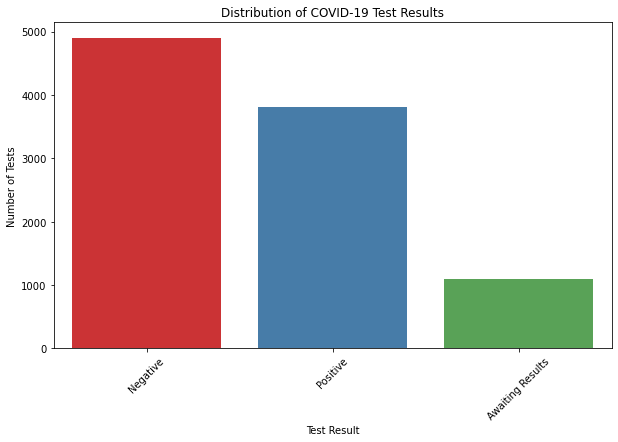

In [31]:
# Group data by 'covid_res' and count occurrences
covid_results_counts = df['covid_res'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=covid_results_counts.index, y=covid_results_counts.values, palette='Set1') 
plt.title('Distribution of COVID-19 Test Results')
plt.xlabel('Test Result')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.show()


The graph shows the highest number of negative covid results of aproximately 5000 , followed by positive results of approximately 4000 lastly appproximately 1000 people had not  yet received their results.

**Bivariate**

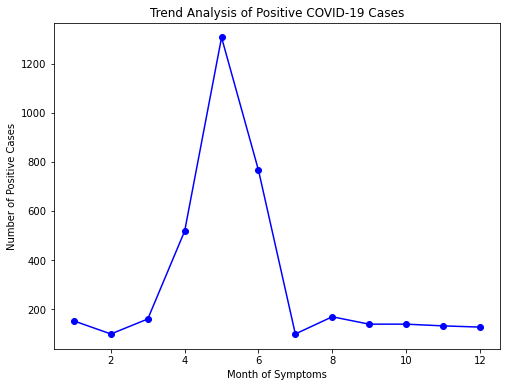

In [32]:

# Filter data for positive cases
positive_cases = df[df['covid_res'] == 'Positive']

# Group by date_symptoms and count positive cases for each date
trend = positive_cases.groupby('date_symptoms').size()

# Plot the trend
plt.figure(figsize=(8, 6))
trend.plot(kind='line', marker='o', color='b')
plt.title('Trend Analysis of Positive COVID-19 Cases')
plt.xlabel('Month of Symptoms')
plt.ylabel('Number of Positive Cases')


# plt.grid(True)
plt.show()


The 5th month (May)  had the highest number of positive covid results and the cases dropped significantly during the month of July.

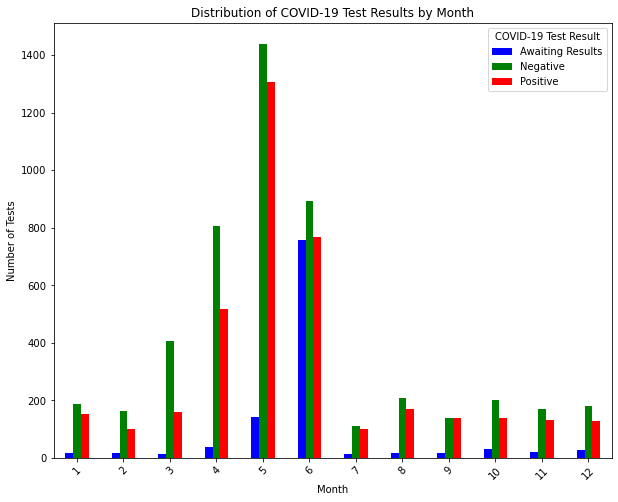

In [33]:
# Filter data for positive COVID-19 tests
df_positive = df[df['covid_res'].isin(['Negative', 'Positive', 'Awaiting Results'])]

# Count COVID-19 tests by month and result
test_counts_by_month = df_positive.groupby(['date_symptoms', 'covid_res']).size().unstack(fill_value=0)

#plotting
test_counts_by_month.plot(kind='bar', stacked=False, color=['blue', 'green', 'red'], figsize=(10,8))
plt.title('Distribution of COVID-19 Test Results by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tests') 
plt.xticks(rotation=45) 
plt.legend(title='COVID-19 Test Result')
plt.show();


May had the highest number of covid Test results  while July had the least number of covid test results.

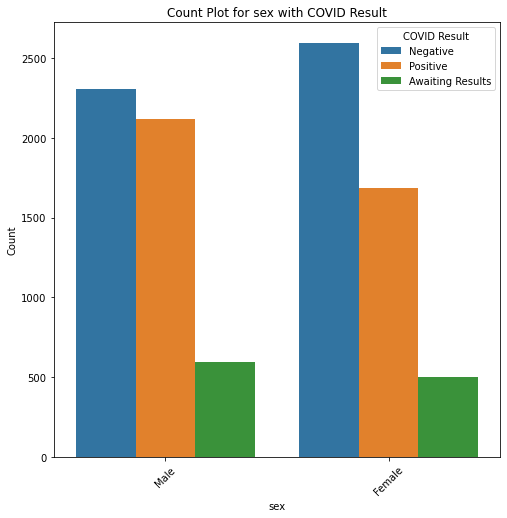

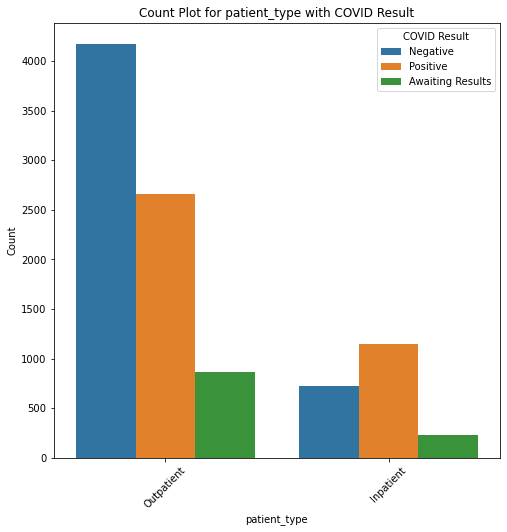

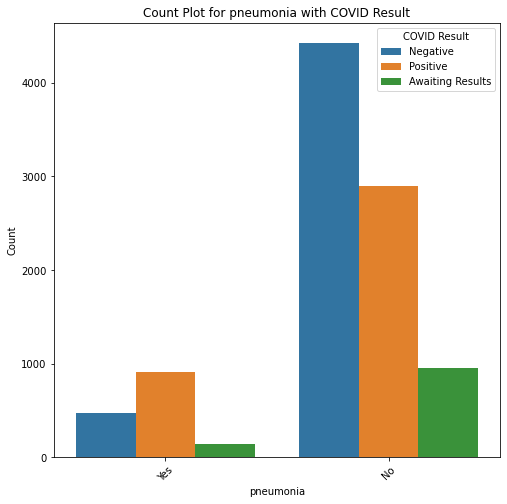

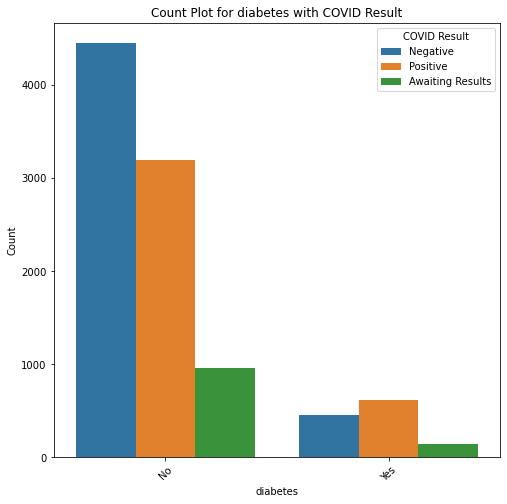

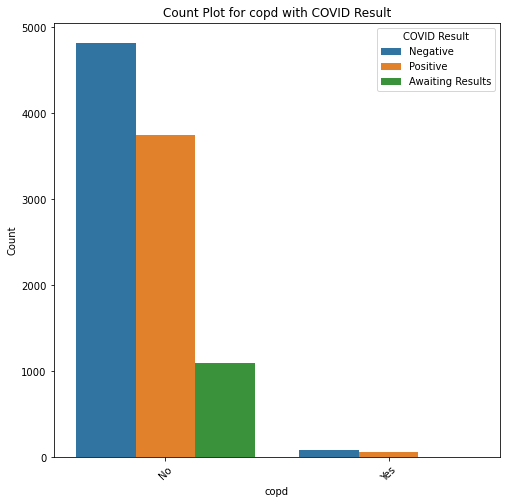

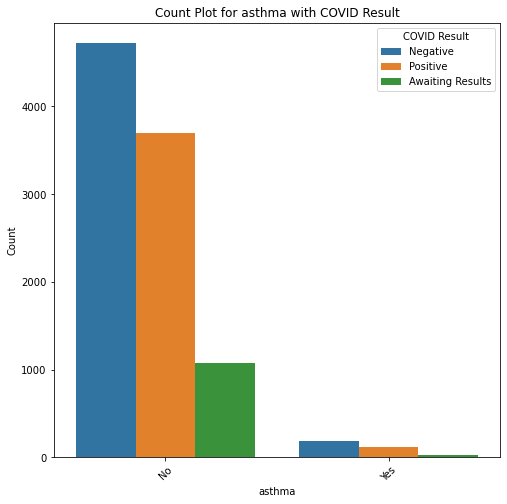

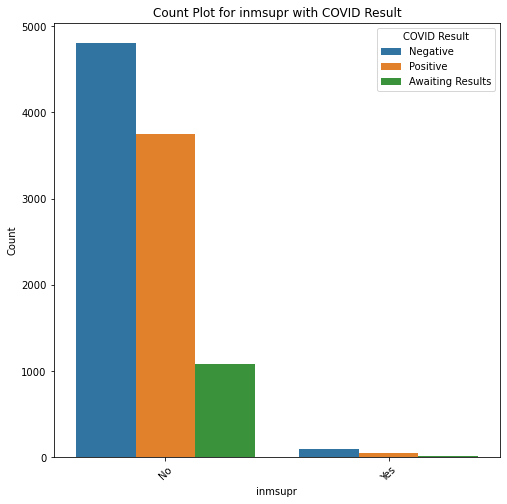

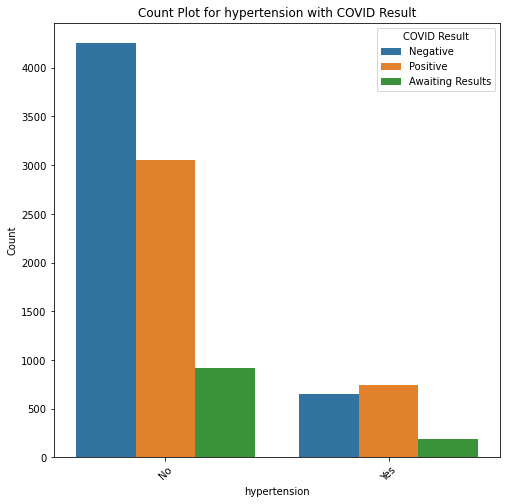

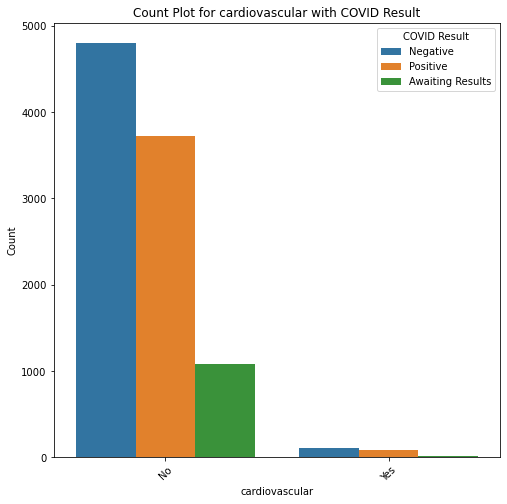

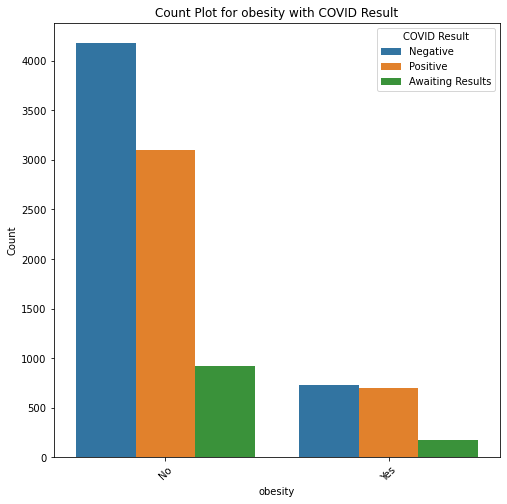

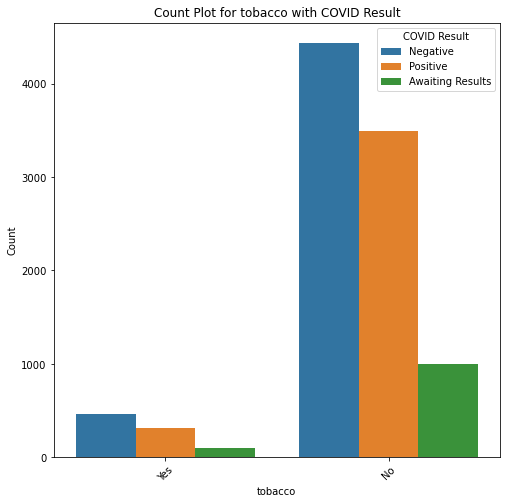

In [34]:
def multivariate_analysis(df):
     # Create a count plot for categorical variables
    categorical_cols = ['sex', 'patient_type', 'pneumonia', 
                        'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 
                    'cardiovascular', 'obesity', 
                        'tobacco']
    for col in categorical_cols:
        plt.figure(figsize=(8, 8))
        sns.countplot(x=col, hue='covid_res', data=df)
        plt.title(f'Count Plot for {col} with COVID Result')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='COVID Result')
        plt.show()

        # Call the function with your DataFrame
multivariate_analysis(df)

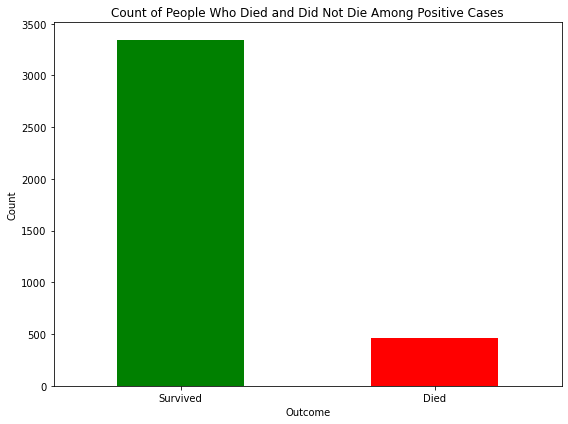

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date_died' column contains dates for individuals who died (NaN for those who did not)
# Assuming 'covid_res' column contains values 'Positive' for positive cases and 'Negative' for negative cases

# Filter data for positive cases
positive_cases = df[df['covid_res'] == 'Positive']

# Count the number of people who died and did not die among positive cases
death_counts = positive_cases['date_died'].notnull().value_counts()

# Plot grouped bar plot
death_counts.plot(kind='bar', color=['green', 'red'], figsize=(8, 6))

# Set plot labels and title 
plt.title('Count of People Who Died and Did Not Die Among Positive Cases')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Set x-axis labels
plt.xticks(ticks=[0, 1], labels=['Survived', 'Died'], rotation=0)

# Show plot
plt.tight_layout()
plt.show()


Most of the people that had tested positive survived while those that died were few approximately 400.

**Multivariate Analysis**

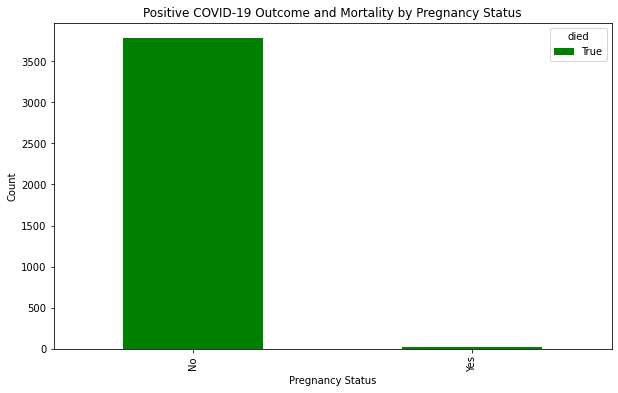

In [36]:
# Filter data for positive cases
positive_cases = df[df['covid_res'] == 'Positive']

# Count the number of people who died and survived among positive cases, grouped by pregnancy status
grouped_data = positive_cases.groupby(['pregnancy', positive_cases['died'].notnull()]).size().unstack()

# Plot grouped bar plot
grouped_data.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Set plot labels and title
plt.title('Positive COVID-19 Outcome and Mortality by Pregnancy Status')
plt.xlabel('Pregnancy Status')
plt.ylabel('Count');


Most of the people that were not pregnant and tested positive died

## Modelling

### Data Preprocessing

In [37]:
df['covid_res']= df['covid_res'].replace({'Negative':0, 'Positive':1, 'Awaiting Results':2})

In [38]:
df['covid_res'].value_counts()

0    4900
1    3806
2    1100
Name: covid_res, dtype: int64

In [39]:
# Drop rows with value 2 in 'covid_res' column
df= df[df['covid_res'] != 2]

In [40]:
X=df.drop(['covid_res', 'entry_date', 'date_died', 'pregnancy'], axis=1)
y=df['covid_res']
# Split the data into training and test sets (assign 20% to test set)
X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [41]:
# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
#          ('num', SimpleImputer(strategy='most_frequent'), ['pregnancy']), 
        ('cat', OneHotEncoder(), ['sex', 'patient_type','pneumonia', 'diabetes', 'copd', 'asthma', 
                                  'inmsupr', 'hypertension', 'other_disease', 
                                  'cardiovascular', 'obesity', 'renal_chronic', 
                                  'tobacco']),  # One-hot encode 'sex' and 'patient_type' columns
        # Impute missing values in 'pregnancy' column using median  # Logarithmic transformation on 'age' column
    ],
    remainder='passthrough'  # passthrough any other columns
)

# Define the pipeline
pipeline = ImbPipeline(steps=[('preprocessor', preprocessor)])



# Fit and transform the data
X_train_processed = pipeline.fit_transform(X_train)

# Get the feature names after transformation
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names(input_features=['sex', 'patient_type','pneumonia', 'diabetes', 'copd', 'asthma', 
                                  'inmsupr', 'hypertension', 'other_disease', 
                                  'cardiovascular', 'obesity', 'renal_chronic', 
                                  'tobacco'])
feature_names = list(cat_feature_names) + X_train.columns.drop(['sex', 'patient_type','pneumonia', 'diabetes', 'copd', 'asthma', 
                                  'inmsupr', 'hypertension', 'other_disease', 
                                  'cardiovascular', 'obesity', 'renal_chronic', 
                                  'tobacco']).tolist()

# Create DataFrame from transformed data and feature names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
# Define columns to scale
columns_to_scale = ['age','date_symptoms'] 

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the specified columns
X_train_processed_df[columns_to_scale] = scaler.fit_transform(X_train_processed_df[columns_to_scale])

print("Processed data:")
X_train_processed_df.head()


Processed data:


,sex_Female,sex_Male,patient_type_Inpatient,patient_type_Outpatient,pneumonia_No,pneumonia_Yes,diabetes_No,diabetes_Yes,copd_No,copd_Yes,...,cardiovascular_Yes,obesity_No,obesity_Yes,renal_chronic_No,renal_chronic_Yes,tobacco_No,tobacco_Yes,date_symptoms,age,died
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.958474,-0.740970,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-1.880853,-0.621432,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.258380,-0.083515,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.769710,1.709543,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.258380,-1.398424,0.0


In [42]:
# Transform the test data using the preprocessor pipeline
X_test_processed = pipeline.transform(X_test)

# Create DataFrame from transformed test data and feature names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)
# Fit and transform the scaler on the specified columns
X_test_processed_df[columns_to_scale] = scaler.transform(X_test_processed_df[columns_to_scale])
print("Processed test data:")
X_test_processed_df.head()

Processed test data:


,sex_Female,sex_Male,patient_type_Inpatient,patient_type_Outpatient,pneumonia_No,pneumonia_Yes,diabetes_No,diabetes_Yes,copd_No,copd_Yes,...,cardiovascular_Yes,obesity_No,obesity_Yes,renal_chronic_No,renal_chronic_Yes,tobacco_No,tobacco_Yes,date_symptoms,age,died
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.769710,0.155559,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.663998,-0.501895,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.147238,1.709543,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.663998,0.753245,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.663998,1.470469,0.0


### Creating a baseline model to serve as a point of reference.


In healthcare decisions related to COVID-19, where timely identification and containment of cases are crucial for public health, prioritizing recall might be more important. Ensuring that true positive cases are not missed helps in early detection, isolation, and treatment, ultimately limiting the spread of the virus and mitigating its impact on public health.

**True Positives (TP):** The number of observations where the model predicted the test result as positive, and the individual does have COVID-19.

**True Negatives (TN):** The number of observations where the model predicted the test result as negative, and the individual is indeed free of COVID-19.

**False Positives (FP):** The number of observations where the model predicted the test result as positive, but the individual does not have COVID-19.

**False Negatives (FN):** The number of observations where the model predicted the test result as negative, but the individual does have COVID-19.

In [43]:
logreg=LogisticRegression(fit_intercept=False, C=1e3, solver='liblinear', random_state=42)
# Fit the model
logreg.fit(X_train_processed,y_train) 

LogisticRegression(C=1000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')

In [44]:
y_hat_train = logreg.predict(X_train_processed)
y_hat_test = logreg.predict(X_test_processed_df)
# Calculate the probability scores of each point in the test set
# y_score = logreg.decision_function(X_test_processed_df)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.87      0.72      1195
           1       0.68      0.34      0.45       982

    accuracy                           0.63      2177
   macro avg       0.65      0.60      0.58      2177
weighted avg       0.64      0.63      0.60      2177

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      3705
           1       0.68      0.32      0.43      2824

    accuracy                           0.64      6529
   macro avg       0.65      0.60      0.58      6529
weighted avg       0.65      0.64      0.60      6529



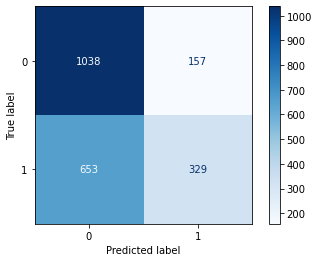

In [45]:
# Generate classification report
report = classification_report(y_test, y_hat_test)
report2 = classification_report(y_train, y_hat_train)
print("Classification Report:")
print(report)
print(report2)
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show(); 

**Observations**

**Accuracy:** The model's accuracy is 63%, indicating the percentage of correctly predicted instances. However, it should be considered alongside other metrics for a complete evaluation.

**Precision:** The precision is 68%, implying that more than half of the predicted positive instances are actually true positives.

**Recall:** The recall is 34%, indicating the model's ability to correctly identify positive cases among all actual positive cases.

**F1 Score:** The F1 score, at 0.453731, represents a moderate balance between precision and recall.

**Confusion Matrix :** The confusion matrix provides a detailed breakdown of the model's predictions, including the number of true negatives, false positives, false negatives, and true positives.


The confusion matrix provides information on the model's performance in classifying instances. In this case, the confusion matrix reveals the following:

**True Negatives (TN):** There are 1039 instances where the model predicted the test result as negative, and the individual is indeed free of COVID-19..

**False Positives (FP):** There are 156 instances where the model predicted the test result as positive, but the individual does not have COVID-19.

**False Negatives (FN):** There are 653 instances where the model predicted the test result as negative, but the individual does have COVID-19

**True Positives (TP):** There are 329 instances where the model predicted the test result as positive, and the individual does have COVID-19.

Based on the confusion matrix, it is evident that the model struggles with correctly identifying instances that are actually positive results, as indicated by the relatively high number of false negatives (653). This observation aligns with the low recall score (34%) obtained in the evaluation results.


#### Logisitic regression with Adaboostclassifier 

0    3705
1    2824
Name: covid_res, dtype: int64


1    3705
0    3705
Name: covid_res, dtype: int64
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1195
           1       0.59      0.49      0.54       982

    accuracy                           0.62      2177
   macro avg       0.61      0.61      0.61      2177
weighted avg       0.61      0.62      0.61      2177



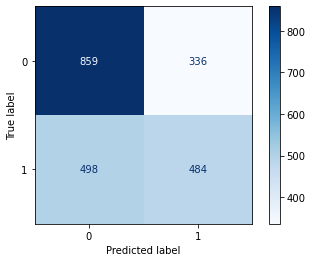

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      3705
           1       0.57      0.47      0.52      2824

    accuracy                           0.62      6529
   macro avg       0.61      0.60      0.60      6529
weighted avg       0.61      0.62      0.61      6529



In [46]:
from sklearn.ensemble import AdaBoostClassifier
 # Previous original class distribution
print(y_train.value_counts()) 

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)
print('\n')
print(pd.Series(y_resampled).value_counts())

# Create the logistic regression base learner
base_estimator = LogisticRegression()

# Create the AdaBoost classifier with logistic regression as the base learner
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_clf.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred1 = adaboost_clf.predict(X_test_processed)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show(); 
y_hat_t=adaboost_clf.predict(X_train_processed)
print(classification_report(y_train, y_hat_t )) 

#### Observations 
**Accuracy:**

The model's accuracy is 62%, indicating the percentage of correctly predicted instances. While this is slightly above random guessing for a balanced dataset, it should be considered alongside other metrics to understand its real-world performance.

**Overall Precision (68%):**
This was incorrectly stated in the provided criteria. Correct precision is 59% for class 1 and 63% for class 0.
Precision of 59% for positive cases means that more than half of the predicted positive instances are true positives.
Recall:

**Overall Recall (34%):**
This was also incorrectly stated. Correct recall is 49% for class 1 and 72% for class 0.
Recall of 49% for positive cases indicates that the model is missing half of the actual positive cases, which is concerning for early detection and containment.
F1 Score:

**Overall F1 Score (54%):**
This was incorrectly stated. Correct F1 score is 0.54 for class 1 and 0.67 for class 0.
An F1 score of 0.54 for positive cases represents a moderate balance between precision and recall but indicates room for improvement in both metrics.
Confusion Matrix:

**True Negatives (TN):** 861 instances where the model predicted the test result as negative, and the individual is indeed free of COVID-19.
**False Positives (FP):** 334 instances where the model predicted the test result as positive, but the individual does not have COVID-19

**False Negatives (FN):** 500 instances  where the model predicted the test result as negative, but the individual does have COVID-19

**True Positives (TP):** 482 instances where the model predicted the test result as positive, and the individual does have COVID-19.

**Critical Observations:**

The high number of false negatives (500) is problematic, as it indicates many positive cases are not being detected, which can lead to further spread of COVID-19.
The confusion matrix aligns with the low recall score (49%) for positive cases, reflecting the model's difficulty in identifying actual positive cases.

#### GridSearch CV 

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      1195
           1       0.59      0.50      0.54       982

    accuracy                           0.62      2177
   macro avg       0.61      0.61      0.61      2177
weighted avg       0.61      0.62      0.61      2177



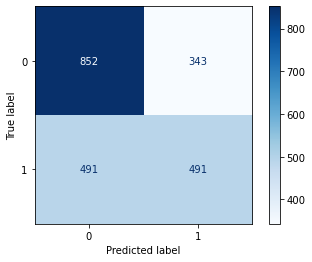

In [47]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']                # Penalty ('l1' for Lasso, 'l2' for Ridge)
}

# Create the logistic regression classifier
clf = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test_processed)

# Print the classification report
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show(); 

**Accuracy:**

The model's accuracy is 62%, meaning that 62% of the total predictions (both positive and negative) are correct

**Precision:** The precision is 59%, implying that more than half of the predicted positive instances are actually true positives, but there is still a significant number of false positives.

**Recall:** The recall for class 1 indicates that the model misses 50% of the actual positive cases, which is concerning for early detection and containment.

**F1 Score:** The F1 score, at 54%, represents a moderate balance between precision and recall.

**Detailed Confusion Matrix Evaluation**
True Negatives (TN): 849 instances where the model correctly predicted negative cases.

**False Positives (FP):** 346 instances where the model incorrectly predicted positive cases (individuals do not have COVID-19 but were predicted as positive).

**False Negatives (FN):** 491 instances where the model incorrectly predicted negative cases (individuals have COVID-19 but were predicted as negative).

**True Positives (TP):** 491 instances where the model predicted the test result as positive, and the individual does have COVID-19

## Decision Trees

              precision    recall  f1-score   support

           0       0.64      0.46      0.54      1195
           1       0.51      0.68      0.59       982

    accuracy                           0.56      2177
   macro avg       0.58      0.57      0.56      2177
weighted avg       0.58      0.56      0.56      2177



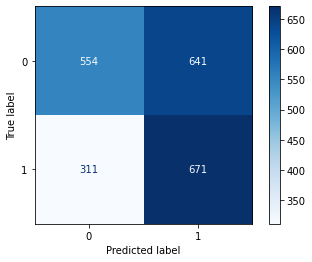

In [48]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_resampled, y_resampled)
y_pred=clf.predict(X_test_processed) 
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show();

### **Decision Trees with Bagging Performance:**

Decision Trees with Bagging Performance:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1195
           1       0.65      0.40      0.50       982

    accuracy                           0.63      2177
   macro avg       0.64      0.61      0.60      2177
weighted avg       0.63      0.63      0.61      2177



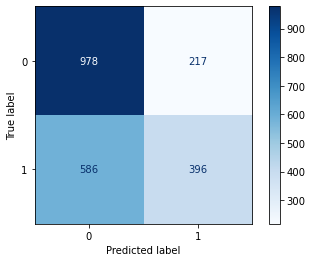

In [49]:
# Decision Tree with bagging
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=5),
                                 n_estimators=10, random_state=42)
bagging_clf.fit(X_resampled,y_resampled)  
bagging_y_pred = bagging_clf.predict(X_test_processed) 

print("Decision Trees with Bagging Performance:")
print(classification_report(y_test, bagging_y_pred)) 
cm = confusion_matrix(y_test, bagging_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show();



**Obseravtions**

**Accuracy:**
The model's accuracy is 63%, meaning that 63% of the total predictions (both positive and negative) are correct.
Precision:

**precision** for class 1 (positive cases) is 65%, implying that more than half of the predicted positive instances are actually true positives. However, there are still a significant number of false positives, indicated by the relatively high number of false positives (346 instances).

**Recall:**
The recall for class 1 (positive cases) is 40%, indicating that the model misses 60% of the actual positive cases. This is concerning for early detection and containment of COVID-19, as a high recall is crucial for identifying as many positive cases as possible.

**F1 Score:**
The F1 score for class 1 (positive cases) is 50%, representing a moderate balance between precision and recall. However, there is room for improvement, particularly in recall.

**Confusion Matrix Evaluation**
**True Negatives (TN):** 978 instances where the model correctly predicted negative cases.

**False Positives (FP):** 217 instances where the model incorrectly predicted positive cases (individuals do not have COVID-19 but were predicted as positive).

**False Negatives (FN):** 585 instances where the model incorrectly predicted negative cases (individuals have COVID-19 but were predicted as negative).

**True Positives (TP):** 397 instances where the model correctly predicted positive cases.

**Critical Observations**
High Number of False Negatives (FN): 585 false negatives indicate that the model misses a significant portion of actual positive cases. This poses a risk as it leads to undetected COVID-19 cases, potentially contributing to further spread.


Random Forest with Subspace Sampling Performance:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1195
           1       0.50      0.48      0.49       982

    accuracy                           0.55      2177
   macro avg       0.55      0.55      0.55      2177
weighted avg       0.55      0.55      0.55      2177



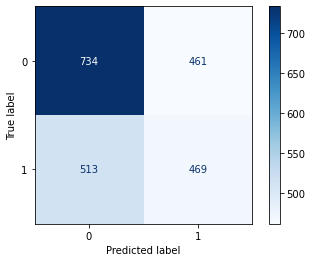

In [50]:
# Random Forest with subspace sampling (Random Subspaces)
subspace_clf = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=42)
subspace_clf.fit(X_resampled,y_resampled)
subspace_y_pred = subspace_clf.predict(X_test_processed)

print("Random Forest with Subspace Sampling Performance:")
print(classification_report(y_test, subspace_y_pred))

cm = confusion_matrix(y_test, subspace_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show();



**Observations**

**True Negatives (TN):** 861 instances where the model correctly predicted negative cases.

**False Positives (FP):** 334 instances where the model incorrectly predicted positive cases (individuals do not have COVID-19 but were predicted as positive).

**False Negatives (FN):** 500 instances where the model incorrectly predicted negative cases (individuals have COVID-19 but were predicted as negative).

**True Positives (TP):** 482 instances where the model correctly predicted positive cases.

**Critical Observations**
**High Number of False Negatives (FN):** 500 false negatives indicate that the model misses a significant portion of actual positive cases. This poses a risk as it leads to undetected COVID-19 cases, potentially contributing to further spread.
Low Recall for Positive Cases: The low recall for positive cases (47%) indicates that the model struggles to identify actual positive cases, which is concerning for early detection and containment of COVID-19.

### Random Forest with Bagging and Subspace Sampling:

Random Forest with Bagging and Subspace Sampling Performance:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1195
           1       0.51      0.49      0.50       982

    accuracy                           0.56      2177
   macro avg       0.55      0.55      0.55      2177
weighted avg       0.55      0.56      0.56      2177



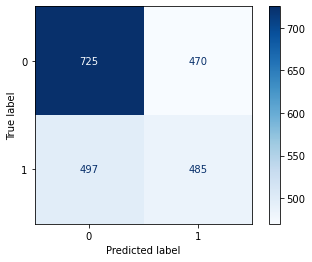

In [51]:
# Define parameters for Random Forest
n_estimators = 15 # Number of trees in the forest
max_features = 'sqrt'  # Number of features to consider when looking for the best split

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=42)

# Create a Bagging classifier with Random Forest as the base estimator
# bagging_rf_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=n_estimators, random_state=42)

# Fit the ensemble model on training data
rf_clf.fit(X_resampled, y_resampled)   

# Predict using the ensemble model
y_pred_bs = rf_clf.predict(X_test_processed)

# Evaluate performance
print("Random Forest with Bagging and Subspace Sampling Performance:")
print(classification_report(y_test, y_pred_bs))
cm = confusion_matrix(y_test, y_pred_bs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show();

**Accuracy:**

The model's accuracy is 56%, meaning that 56% of the total predictions (both positive and negative) are correct.This is quite low. This indicates that the model is making a significant number of incorrect predictions

**Precision:** The precision is 52%, implying 52% of the predicted positive instances are actually true positives, but there is still a significant number of false positives.

**Recall:** The recall for class 1 indicates that the model misses 50% of the actual positive cases.

**F1 Score:** The F1 score, at 52%, represents a moderate balance between precision and recall.

**Detailed Confusion Matrix Evaluation**
True Negatives (TN): 725 instances where the model correctly predicted negative cases.

False Positives (FP): 470 instances where the model incorrectly predicted positive cases (individuals do not have COVID-19 but were predicted as positive).

False Negatives (FN): 478 instances where the model incorrectly predicted negative cases (individuals have COVID-19 but were predicted as negative).

True Positives (TP): 504 instances where the model predicted the test result as positive, and the individual does have COVID-19

**Plot for the ROC AUC values of Logistic Regression, Decision Trees**

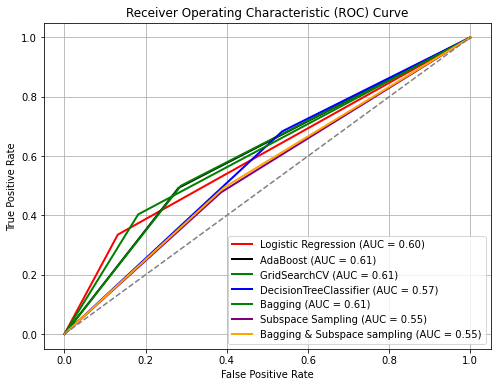

In [52]:
from sklearn.metrics import roc_auc_score

# Calculate ROC curve for each model
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
fpr1, tpr1, thresholds= roc_curve(y_test, y_pred1)
fpr2, tpr2, thresholds= roc_curve(y_test, y_pred2) #gridsearchlr
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred)
# fpr4, tpr4, _ = roc_curve(y_test, y_pred_rand)
fpr5, tpr5, _ = roc_curve(y_test, bagging_y_pred)
fpr6, tpr6, _ = roc_curve(y_test, subspace_y_pred)
fpr7, tpr7, _ = roc_curve(y_test, y_pred_bs)

# Calculate AUC for each model
auc = roc_auc_score(y_test, y_hat_test)
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
auc3 = roc_auc_score(y_test, y_pred)
# auc4 = roc_auc_score(y_test, y_pred_rand)
auc5 = roc_auc_score(y_test, bagging_y_pred)
auc6 = roc_auc_score(y_test, subspace_y_pred)
auc7 = roc_auc_score(y_test, y_pred_bs)


# Calculate ROC curve for each model

# Calculate AUC for each model

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')

# Plot AdaBoost ROC curve
plt.plot(fpr1, tpr1, color='black', lw=2, label=f'AdaBoost (AUC = {auc1:.2f})')

# Plot Best Model ROC curve
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'GridSearchCV (AUC = {auc2:.2f})')

# Plot DecisionTreeClassifier ROC curve
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'DecisionTreeClassifier (AUC = {auc3:.2f})')

# Plot RandomSearchCV ROC curve
# plt.plot(fpr1, tpr1, color='red', lw=2, label=f'RandomSearchCV (AUC = {auc4:.2f})') 

# Plot Bagging ROC curve
plt.plot(fpr5, tpr5, color='green', lw=2, label=f'Bagging (AUC = {auc5:.2f})')

# Plot Subspace Sampling ROC curve
plt.plot(fpr6, tpr6, color='purple', lw=2, label=f'Subspace Sampling (AUC = {auc6:.2f})')

# Plot GridSearchLR ROC curve
plt.plot(fpr7, tpr7, color='orange', lw=2, label=f'Bagging & Subspace sampling (AUC = {auc7:.2f})')


# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Best Model : Logistic Regression with GridSearchCV 
Logistic Regression with GridSearchCV  appears to be the best performer among the models in predicting the highest percentage 
of positive cases with a recall of 50%.It also has on of the best ROC of 61% This means that individuals who actually have the virus are more likely to be identified correctly. This would be the best Model for the Ministry of Health to ensure:

Accurate case predictions support the planning and distribution of healthcare resources like hospital beds, ventilators, and medical staff.
Identification of  high-risk groups and optimizing vaccine distribution.

### Feature Importance
The Best perofroming Model was Logistic Regression with GridSearchCV . Below is a rank of the features of importance:

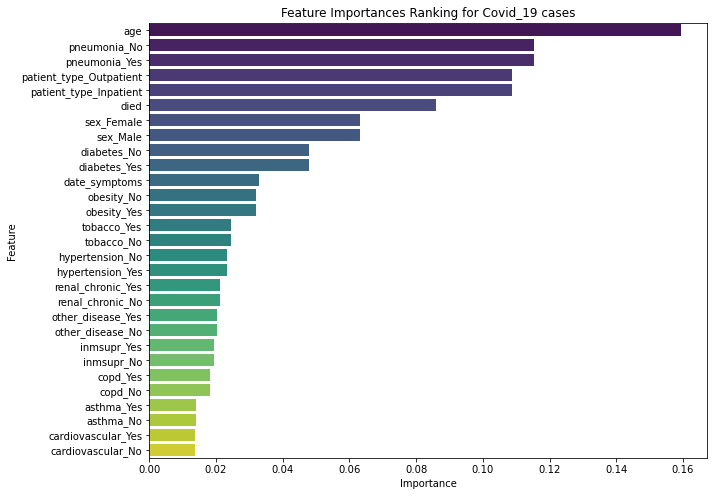

In [53]:

import pandas as pd

coefficients = best_model.coef_[0]
features = X_train_processed_df.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Absolute value of coefficients to understand the magnitude of importance
importance_df['Importance'] = importance_df['Coefficient'].abs()

# Sort by the importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print(importance_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the feature importances using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importances Ranking for Covid_19 cases')
plt.show()


**The Most important features for predicting Covid19 positive results are:**


age

patient_type_Inpatient

patient_type_Outpatient

date_symptoms

pneumonia_yes

pneumonia_no

died 



## Conclusion and Recomendations
 * Prioritize vaccination for older adults, as age is a significant predictor of severe COVID-19 outcomes.

* Prioritize allocation of hospital beds and ventilators to facilities handling a higher proportion of inpatients, as these patients are more likely to have severe cases.

* Ensure that hospitals with a high number of inpatients are adequately staffed with specialized healthcare professionals.

* Respiratory Support: Provide adequate respiratory support, including supplemental oxygen and ventilators, for patients with pneumonia.

* Implement aggressive testing and contact tracing strategies for individuals who report early onset of symptoms to quickly identify and isolate positive cases.
 
* Conduct thorough reviews of mortality cases to identify factors leading to severe outcomes and improve treatment protocols.




### Limitations
The dataset used in the case study was constrained by limited information. Key factors like vaccination status, geographic location, behavioral aspects such as mask-wearing, symptom severity, and genetic history could significantly enhance accuracy and predictive capabilities.Some features also had a large percetage of missing values.